In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path
import glob
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
# Read catalogs
filename="bc03_hr_m62_chab_deltau005.3color"
lage1B_m62, D4000w1B_m62, D4000n1B_m62 = np.genfromtxt(filename, comments="#", usecols=(0,1,2), dtype=None, unpack=True)

filename="bc03_hr_m62_chab_deltau01.3color"
lage2B_m62, D4000w2B_m62, D4000n2B_m62 = np.genfromtxt(filename, comments="#", usecols=(0,1,2), dtype=None, unpack=True)

filename="bc03_hr_m62_chab_deltau02.3color"
lage3B_m62, D4000w3B_m62, D4000n3B_m62 = np.genfromtxt(filename, comments="#", usecols=(0,1,2), dtype=None, unpack=True)

filename="bc03_hr_m62_chab_deltau03.3color"
lage4B_m62, D4000w4B_m62, D4000n4B_m62 = np.genfromtxt(filename, comments="#", usecols=(0,1,2), dtype=None, unpack=True)
	
filename="bc03_hr_m52_chab_deltau005.3color"
lage1B_m52, D4000w1B_m52, D4000n1B_m52 = np.genfromtxt(filename, comments="#", usecols=(0,1,2), dtype=None, unpack=True)

filename="bc03_hr_m52_chab_deltau01.3color"
lage2B_m52, D4000w2B_m52, D4000n2B_m52 = np.genfromtxt(filename, comments="#", usecols=(0,1,2), dtype=None, unpack=True)

filename="bc03_hr_m52_chab_deltau02.3color"
lage3B_m52, D4000w3B_m52, D4000n3B_m52 = np.genfromtxt(filename, comments="#", usecols=(0,1,2), dtype=None, unpack=True)

filename="bc03_hr_m52_chab_deltau03.3color"
lage4B_m52, D4000w4B_m52, D4000n4B_m52 = np.genfromtxt(filename, comments="#", usecols=(0,1,2), dtype=None, unpack=True)

filename="bc03_hr_m72_chab_deltau005.3color"
lage1B_m72, D4000w1B_m72, D4000n1B_m72 = np.genfromtxt(filename, comments="#", usecols=(0,1,2), dtype=None, unpack=True)

filename="bc03_hr_m72_chab_deltau01.3color"
lage2B_m72, D4000w2B_m72, D4000n2B_m72 = np.genfromtxt(filename, comments="#", usecols=(0,1,2), dtype=None, unpack=True)

filename="bc03_hr_m72_chab_deltau02.3color"
lage3B_m72, D4000w3B_m72, D4000n3B_m72 = np.genfromtxt(filename, comments="#", usecols=(0,1,2), dtype=None, unpack=True)

filename="bc03_hr_m72_chab_deltau03.3color"
lage4B_m72, D4000w4B_m72, D4000n4B_m72 = np.genfromtxt(filename, comments="#", usecols=(0,1,2), dtype=None, unpack=True)


In [3]:
##############################################
# Estimate variables
##############################################

sel_D4000='w'

vnum=[1,2,3,4]
vmet=[52,62,72]
for num in vnum:
        for met in vmet:
                exec('age'+str(num)+'B_m'+str(met)+'=10**lage'+str(num)+'B_m'+str(met)+'/1e9')

D4000min=raw_input('\nEnter minimum D4000 ([1.4]): ') or 1.4
D4000min=float(D4000min)
D4000med=raw_input('\nEnter medium D4000 ([1.7]): ') or 1.7
D4000med=float(D4000med)
D4000max=raw_input('\nEnter maximum D4000 ([1.85]): ') or 1.85
D4000max=float(D4000max)

#######################

exec('a1B_m=age1B_m62[np.logical_and(D4000'+sel_D4000+'1B_m62>D4000min, D4000'+sel_D4000+'1B_m62<D4000med)]')
exec('D1B_m=D4000'+sel_D4000+'1B_m62[np.logical_and(D4000'+sel_D4000+'1B_m62>D4000min, D4000'+sel_D4000+'1B_m62<D4000med)]')
exec('a2B_m=age2B_m62[np.logical_and(D4000'+sel_D4000+'2B_m62>D4000min, D4000'+sel_D4000+'2B_m62<D4000med)]')
exec('D2B_m=D4000'+sel_D4000+'2B_m62[np.logical_and(D4000'+sel_D4000+'2B_m62>D4000min, D4000'+sel_D4000+'2B_m62<D4000med)]')
exec('a3B_m=age3B_m62[np.logical_and(D4000'+sel_D4000+'3B_m62>D4000min, D4000'+sel_D4000+'3B_m62<D4000med)]')
exec('D3B_m=D4000'+sel_D4000+'3B_m62[np.logical_and(D4000'+sel_D4000+'3B_m62>D4000min, D4000'+sel_D4000+'3B_m62<D4000med)]')
exec('a4B_m=age4B_m62[np.logical_and(D4000'+sel_D4000+'4B_m62>D4000min, D4000'+sel_D4000+'4B_m62<D4000med)]')
exec('D4B_m=D4000'+sel_D4000+'4B_m62[np.logical_and(D4000'+sel_D4000+'4B_m62>D4000min, D4000'+sel_D4000+'4B_m62<D4000med)]')
res=np.polyfit(a1B_m,D1B_m,1)
A1B_m=res[0]
B1B_m=res[1]
res=np.polyfit(a2B_m,D2B_m,1)
A2B_m=res[0]
B2B_m=res[1]
res=np.polyfit(a3B_m,D3B_m,1)
A3B_m=res[0]
B3B_m=res[1]
res=np.polyfit(a4B_m,D4B_m,1)
A4B_m=res[0]
B4B_m=res[1]

exec('a1B_m52_m=age1B_m52[np.logical_and(D4000'+sel_D4000+'1B_m52>D4000min, D4000'+sel_D4000+'1B_m52<D4000med)]')#, age1B_m52<15]')
exec('D1B_m52_m=D4000'+sel_D4000+'1B_m52[np.logical_and(D4000'+sel_D4000+'1B_m52>D4000min, D4000'+sel_D4000+'1B_m52<D4000med)]')#, age1B_m52<15]')
exec('a2B_m52_m=age2B_m52[np.logical_and(D4000'+sel_D4000+'2B_m52>D4000min, D4000'+sel_D4000+'2B_m52<D4000med)]')#, age1B_m52<15]')
exec('D2B_m52_m=D4000'+sel_D4000+'2B_m52[np.logical_and(D4000'+sel_D4000+'2B_m52>D4000min, D4000'+sel_D4000+'2B_m52<D4000med)]')#, age1B_m52<15]')
exec('a3B_m52_m=age3B_m52[np.logical_and(D4000'+sel_D4000+'3B_m52>D4000min, D4000'+sel_D4000+'3B_m52<D4000med)]')#, age1B_m52<15]')
exec('D3B_m52_m=D4000'+sel_D4000+'3B_m52[np.logical_and(D4000'+sel_D4000+'3B_m52>D4000min, D4000'+sel_D4000+'3B_m52<D4000med)]')#, age1B_m52<15]')
exec('a4B_m52_m=age4B_m52[np.logical_and(D4000'+sel_D4000+'4B_m52>D4000min, D4000'+sel_D4000+'4B_m52<D4000med)]')#, age1B_m52<15]')
exec('D4B_m52_m=D4000'+sel_D4000+'4B_m52[np.logical_and(D4000'+sel_D4000+'4B_m52>D4000min, D4000'+sel_D4000+'4B_m52<D4000med)]')#, age1B_m52<15]')
res=np.polyfit(a1B_m52_m,D1B_m52_m,1)
A1B_m52_m=res[0]
B1B_m52_m=res[1]
res=np.polyfit(a2B_m52_m,D2B_m52_m,1)
A2B_m52_m=res[0]
B2B_m52_m=res[1]
res=np.polyfit(a3B_m52_m,D3B_m52_m,1)
A3B_m52_m=res[0]
B3B_m52_m=res[1]
res=np.polyfit(a4B_m52_m,D4B_m52_m,1)
A4B_m52_m=res[0]
B4B_m52_m=res[1]

exec('a1B_m72_m=age1B_m72[np.logical_and(D4000'+sel_D4000+'1B_m72>D4000min, D4000'+sel_D4000+'1B_m72<D4000med)]')
exec('D1B_m72_m=D4000'+sel_D4000+'1B_m72[np.logical_and(D4000'+sel_D4000+'1B_m72>D4000min, D4000'+sel_D4000+'1B_m72<D4000med)]')
exec('a2B_m72_m=age2B_m72[np.logical_and(D4000'+sel_D4000+'2B_m72>D4000min, D4000'+sel_D4000+'2B_m72<D4000med)]')
exec('D2B_m72_m=D4000'+sel_D4000+'2B_m72[np.logical_and(D4000'+sel_D4000+'2B_m72>D4000min, D4000'+sel_D4000+'2B_m72<D4000med)]')
exec('a3B_m72_m=age3B_m72[np.logical_and(D4000'+sel_D4000+'3B_m72>D4000min, D4000'+sel_D4000+'3B_m72<D4000med)]')
exec('D3B_m72_m=D4000'+sel_D4000+'3B_m72[np.logical_and(D4000'+sel_D4000+'3B_m72>D4000min, D4000'+sel_D4000+'3B_m72<D4000med)]')
exec('a4B_m72_m=age4B_m72[np.logical_and(D4000'+sel_D4000+'4B_m72>D4000min, D4000'+sel_D4000+'4B_m72<D4000med)]')
exec('D4B_m72_m=D4000'+sel_D4000+'4B_m72[np.logical_and(D4000'+sel_D4000+'4B_m72>D4000min, D4000'+sel_D4000+'4B_m72<D4000med)]')
res=np.polyfit(a1B_m72_m,D1B_m72_m,1)
A1B_m72_m=res[0]
B1B_m72_m=res[1]
res=np.polyfit(a2B_m72_m,D2B_m72_m,1)
A2B_m72_m=res[0]
B2B_m72_m=res[1]
res=np.polyfit(a3B_m72_m,D3B_m72_m,1)
A3B_m72_m=res[0]
B3B_m72_m=res[1]
res=np.polyfit(a4B_m72_m,D4B_m72_m,1)
A4B_m72_m=res[0]
B4B_m72_m=res[1]

vecA_B_m=np.array([A1B_m, A2B_m, A3B_m, A4B_m])
vecA_B_m52_m=np.array([A1B_m52_m, A2B_m52_m, A3B_m52_m, A4B_m52_m])
vecA_B_m72_m=np.array([A1B_m72_m, A2B_m72_m, A3B_m72_m, A4B_m72_m])
vecB_B_m=np.array([B1B_m, B2B_m, B3B_m, B4B_m])
vecB_B_m52_m=np.array([B1B_m52_m, B2B_m52_m, B3B_m52_m, B4B_m52_m])
vecB_B_m72_m=np.array([B1B_m72_m, B2B_m72_m, B3B_m72_m, B4B_m72_m])

x=np.arange(0,20,0.001)
yB_m=vecA_B_m.mean()*x+vecB_B_m.mean()
yB_m52_m=vecA_B_m52_m.mean()*x+vecB_B_m52_m.mean()
yB_m72_m=vecA_B_m72_m.mean()*x+vecB_B_m72_m.mean()

vecA_B_m=np.array([A1B_m, A2B_m, A3B_m, A4B_m])
vecA_B_m52_m=np.array([A1B_m52_m, A2B_m52_m, A3B_m52_m, A4B_m52_m])
vecA_B_m72_m=np.array([A1B_m72_m, A2B_m72_m, A3B_m72_m, A4B_m72_m])
vecB_B_m=np.array([B1B_m, B2B_m, B3B_m, B4B_m])
vecB_B_m52_m=np.array([B1B_m52_m, B2B_m52_m, B3B_m52_m, B4B_m52_m])
vecB_B_m72_m=np.array([B1B_m72_m, B2B_m72_m, B3B_m72_m, B4B_m72_m])

x=np.arange(0,20,0.001)
yB_m=vecA_B_m.mean()*x+vecB_B_m.mean()
yB_m52_m=vecA_B_m52_m.mean()*x+vecB_B_m52_m.mean()
yB_m72_m=vecA_B_m72_m.mean()*x+vecB_B_m72_m.mean()

#######################

exec('a1B_h=age1B_m62[np.logical_and(D4000'+sel_D4000+'1B_m62>D4000med, D4000'+sel_D4000+'1B_m62<D4000max)]')
exec('D1B_h=D4000'+sel_D4000+'1B_m62[np.logical_and(D4000'+sel_D4000+'1B_m62>D4000med, D4000'+sel_D4000+'1B_m62<D4000max)]')
exec('a2B_h=age2B_m62[np.logical_and(D4000'+sel_D4000+'2B_m62>D4000med, D4000'+sel_D4000+'2B_m62<D4000max)]')
exec('D2B_h=D4000'+sel_D4000+'2B_m62[np.logical_and(D4000'+sel_D4000+'2B_m62>D4000med, D4000'+sel_D4000+'2B_m62<D4000max)]')
exec('a3B_h=age3B_m62[np.logical_and(D4000'+sel_D4000+'3B_m62>D4000med, D4000'+sel_D4000+'3B_m62<D4000max)]')
exec('D3B_h=D4000'+sel_D4000+'3B_m62[np.logical_and(D4000'+sel_D4000+'3B_m62>D4000med, D4000'+sel_D4000+'3B_m62<D4000max)]')
exec('a4B_h=age4B_m62[np.logical_and(D4000'+sel_D4000+'4B_m62>D4000med, D4000'+sel_D4000+'4B_m62<D4000max)]')
exec('D4B_h=D4000'+sel_D4000+'4B_m62[np.logical_and(D4000'+sel_D4000+'4B_m62>D4000med, D4000'+sel_D4000+'4B_m62<D4000max)]')
res=np.polyfit(a1B_h,D1B_h,1)
A1B_h=res[0]
B1B_h=res[1]
res=np.polyfit(a2B_h,D2B_h,1)
A2B_h=res[0]
B2B_h=res[1]
res=np.polyfit(a3B_h,D3B_h,1)
A3B_h=res[0]
B3B_h=res[1]
res=np.polyfit(a4B_h,D4B_h,1)
A4B_h=res[0]
B4B_h=res[1]

exec('a1B_m52_h=age1B_m52[np.logical_and(D4000'+sel_D4000+'1B_m52>D4000med, D4000'+sel_D4000+'1B_m52<D4000max)]')#, age1B_m52<15]')
exec('D1B_m52_h=D4000'+sel_D4000+'1B_m52[np.logical_and(D4000'+sel_D4000+'1B_m52>D4000med, D4000'+sel_D4000+'1B_m52<D4000max)]')#, age1B_m52<15]')
exec('a2B_m52_h=age2B_m52[np.logical_and(D4000'+sel_D4000+'2B_m52>D4000med, D4000'+sel_D4000+'2B_m52<D4000max)]')#, age1B_m52<15]')
exec('D2B_m52_h=D4000'+sel_D4000+'2B_m52[np.logical_and(D4000'+sel_D4000+'2B_m52>D4000med, D4000'+sel_D4000+'2B_m52<D4000max)]')#, age1B_m52<15]')
exec('a3B_m52_h=age3B_m52[np.logical_and(D4000'+sel_D4000+'3B_m52>D4000med, D4000'+sel_D4000+'3B_m52<D4000max)]')#, age1B_m52<15]')
exec('D3B_m52_h=D4000'+sel_D4000+'3B_m52[np.logical_and(D4000'+sel_D4000+'3B_m52>D4000med, D4000'+sel_D4000+'3B_m52<D4000max)]')#, age1B_m52<15]')
exec('a4B_m52_h=age4B_m52[np.logical_and(D4000'+sel_D4000+'4B_m52>D4000med, D4000'+sel_D4000+'4B_m52<D4000max)]')#, age1B_m52<15]')
exec('D4B_m52_h=D4000'+sel_D4000+'4B_m52[np.logical_and(D4000'+sel_D4000+'4B_m52>D4000med, D4000'+sel_D4000+'4B_m52<D4000max)]')#, age1B_m52<15]')
res=np.polyfit(a1B_m52_h,D1B_m52_h,1)
A1B_m52_h=res[0]
B1B_m52_h=res[1]
res=np.polyfit(a2B_m52_h,D2B_m52_h,1)
A2B_m52_h=res[0]
B2B_m52_h=res[1]
res=np.polyfit(a3B_m52_h,D3B_m52_h,1)
A3B_m52_h=res[0]
B3B_m52_h=res[1]
res=np.polyfit(a4B_m52_h,D4B_m52_h,1)
A4B_m52_h=res[0]
B4B_m52_h=res[1]

exec('a1B_m72_h=age1B_m72[np.logical_and(D4000'+sel_D4000+'1B_m72>D4000med, D4000'+sel_D4000+'1B_m72<D4000max)]')
exec('D1B_m72_h=D4000'+sel_D4000+'1B_m72[np.logical_and(D4000'+sel_D4000+'1B_m72>D4000med, D4000'+sel_D4000+'1B_m72<D4000max)]')
exec('a2B_m72_h=age2B_m72[np.logical_and(D4000'+sel_D4000+'2B_m72>D4000med, D4000'+sel_D4000+'2B_m72<D4000max)]')
exec('D2B_m72_h=D4000'+sel_D4000+'2B_m72[np.logical_and(D4000'+sel_D4000+'2B_m72>D4000med, D4000'+sel_D4000+'2B_m72<D4000max)]')
exec('a3B_m72_h=age3B_m72[np.logical_and(D4000'+sel_D4000+'3B_m72>D4000med, D4000'+sel_D4000+'3B_m72<D4000max)]')
exec('D3B_m72_h=D4000'+sel_D4000+'3B_m72[np.logical_and(D4000'+sel_D4000+'3B_m72>D4000med, D4000'+sel_D4000+'3B_m72<D4000max)]')
exec('a4B_m72_h=age4B_m72[np.logical_and(D4000'+sel_D4000+'4B_m72>D4000med, D4000'+sel_D4000+'4B_m72<D4000max)]')
exec('D4B_m72_h=D4000'+sel_D4000+'4B_m72[np.logical_and(D4000'+sel_D4000+'4B_m72>D4000med, D4000'+sel_D4000+'4B_m72<D4000max)]')
res=np.polyfit(a1B_m72_h,D1B_m72_h,1)
A1B_m72_h=res[0]
B1B_m72_h=res[1]
res=np.polyfit(a2B_m72_h,D2B_m72_h,1)
A2B_m72_h=res[0]
B2B_m72_h=res[1]
res=np.polyfit(a3B_m72_h,D3B_m72_h,1)
A3B_m72_h=res[0]
B3B_m72_h=res[1]
res=np.polyfit(a4B_m72_h,D4B_m72_h,1)
A4B_m72_h=res[0]
B4B_m72_h=res[1]

vecA_B_h=np.array([A1B_h, A2B_h, A3B_h, A4B_h])
vecA_B_m52_h=np.array([A1B_m52_h, A2B_m52_h, A3B_m52_h, A4B_m52_h])
vecA_B_m72_h=np.array([A1B_m72_h, A2B_m72_h, A3B_m72_h, A4B_m72_h])
vecB_B_h=np.array([B1B_h, B2B_h, B3B_h, B4B_h])
vecB_B_m52_h=np.array([B1B_m52_h, B2B_m52_h, B3B_m52_h, B4B_m52_h])
vecB_B_m72_h=np.array([B1B_m72_h, B2B_m72_h, B3B_m72_h, B4B_m72_h])

x=np.arange(0,20,0.001)
yB_h=vecA_B_h.mean()*x+vecB_B_h.mean()
yB_m52_h=vecA_B_m52_h.mean()*x+vecB_B_m52_h.mean()
yB_m72_h=vecA_B_m72_h.mean()*x+vecB_B_m72_h.mean()

#######################

vmetal=np.array([0.008, 0.02, 0.05])
vslope_m=np.array([vecA_B_m52_m.mean(), vecA_B_m.mean(), vecA_B_m72_m.mean()])
errvslope_m=np.array([vecA_B_m52_m.std(), vecA_B_m.std(), vecA_B_m72_m.std()])
vslope_h=np.array([vecA_B_m52_h.mean(), vecA_B_h.mean(), vecA_B_m72_h.mean()])
errvslope_h=np.array([vecA_B_m52_h.std(), vecA_B_h.std(), vecA_B_m72_h.std()])

xx=np.arange(0.008,0.051,1e-3)

res=np.polyfit(vmetal,vslope_m,2)
slope_intp_m=res[0]*xx**2+res[1]*xx+res[2]
res=np.polyfit(vmetal,vslope_m+errvslope_m,2)
slope_intp_m_up=res[0]*xx**2+res[1]*xx+res[2]
res=np.polyfit(vmetal,vslope_m-errvslope_m,2)
slope_intp_m_down=res[0]*xx**2+res[1]*xx+res[2]

res=np.polyfit(vmetal,vslope_h,2)
slope_intp_h=res[0]*xx**2+res[1]*xx+res[2]
res=np.polyfit(vmetal,vslope_h+errvslope_h,2)
slope_intp_h_up=res[0]*xx**2+res[1]*xx+res[2]
res=np.polyfit(vmetal,vslope_h-errvslope_h,2)
slope_intp_h_down=res[0]*xx**2+res[1]*xx+res[2]

#######################

metmin=raw_input('\nEnter minimum metallicity ([0.01]): ') or 0.01
metmin=float(metmin)
metmed=raw_input('\nEnter minimum metallicity ([0.02]): ') or 0.02
metmed=float(metmed)
metmax=raw_input('\nEnter minimum metallicity ([0.03]): ') or 0.03
metmax=float(metmax)

slopemin_h=slope_intp_h_down[abs(xx-metmin)<1e-4]
slopemed_h=slope_intp_h[abs(xx-metmed)<1e-4]
slopemax_h=slope_intp_h_up[abs(xx-metmax)<1e-4]
slopemin_m=slope_intp_m_down[abs(xx-metmin)<1e-4]
slopemed_m=slope_intp_m[abs(xx-metmed)<1e-4]
slopemax_m=slope_intp_m_up[abs(xx-metmax)<1e-4]


Enter minimum D4000 ([1.4]): 

Enter medium D4000 ([1.7]): 

Enter maximum D4000 ([1.85]): 

Enter minimum metallicity ([0.01]): 

Enter minimum metallicity ([0.02]): 

Enter minimum metallicity ([0.03]): 


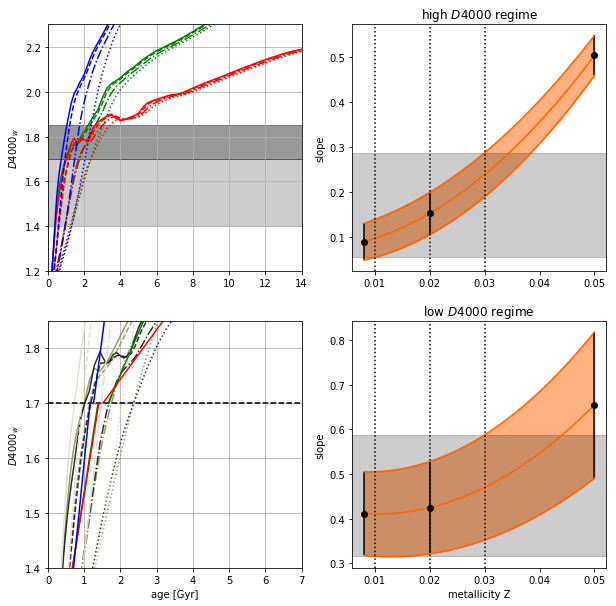

In [4]:
##############################################
# Plot results
##############################################

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)
#gs.update(hspace=0.)

ax1=plt.subplot(gs[0])
ax1.plot(age1B_m62,D4000w1B_m62, color='green', ls='-', label='BC03 Z=0.02')
ax1.plot(age2B_m62,D4000w2B_m62, color='green', ls='--')
ax1.plot(age3B_m62,D4000w3B_m62, color='green', ls='-.')
ax1.plot(age4B_m62,D4000w4B_m62, color='green', ls=':')
ax1.plot(age1B_m52,D4000w1B_m52, color='red', ls='-', label='BC03 Z=0.008')
ax1.plot(age2B_m52,D4000w2B_m52, color='red', ls='--')
ax1.plot(age3B_m52,D4000w3B_m52, color='red', ls='-.')
ax1.plot(age4B_m52,D4000w4B_m52, color='red', ls=':')
ax1.plot(age1B_m72,D4000w1B_m72, color='blue', ls='-', label='BC03 Z=0.05')
ax1.plot(age2B_m72,D4000w2B_m72, color='blue', ls='--')
ax1.plot(age3B_m72,D4000w3B_m72, color='blue', ls='-.')
ax1.plot(age4B_m72,D4000w4B_m72, color='blue', ls=':')
ax1.axhspan(D4000min,D4000med,color='k',alpha=0.2)
ax1.axhspan(D4000med,D4000max,color='k',alpha=0.4)
ax1.set_ylabel(r'$D4000_w$')
#ax1.set_ylabel()
ax1.set_xlim(0,14.)
ax1.set_ylim(1.2,2.3)
ax1.grid()

ax2=plt.subplot(gs[2])
ax2.plot(age1B_m62,D4000w1B_m62, color='#999966', ls='-')
ax2.plot(age2B_m62,D4000w2B_m62, color='#999966', ls='--')
ax2.plot(age3B_m62,D4000w3B_m62, color='#999966', ls='-.')
ax2.plot(age4B_m62,D4000w4B_m62, color='#999966', ls=':')
ax2.plot(age1B_m52,D4000w1B_m52, color='#2e2e1f', ls='-')
ax2.plot(age2B_m52,D4000w2B_m52, color='#2e2e1f', ls='--')
ax2.plot(age3B_m52,D4000w3B_m52, color='#2e2e1f', ls='-.')
ax2.plot(age4B_m52,D4000w4B_m52, color='#2e2e1f', ls=':')
ax2.plot(age1B_m72,D4000w1B_m72, color='#e0e0d1', ls='-')
ax2.plot(age2B_m72,D4000w2B_m72, color='#e0e0d1', ls='--')
ax2.plot(age3B_m72,D4000w3B_m72, color='#e0e0d1', ls='-.')
ax2.plot(age4B_m72,D4000w4B_m72, color='#e0e0d1', ls=':')
ax2.axhline(D4000med, color='k', ls='--')
ax2.plot(x[np.logical_and(yB_m>D4000min,yB_m<D4000med)],yB_m[np.logical_and(yB_m>D4000min,yB_m<D4000med)],color='green')
ax2.plot(x[np.logical_and(yB_m52_m>D4000min,yB_m52_m<D4000med)],yB_m52_m[np.logical_and(yB_m52_m>D4000min,yB_m52_m<D4000med)],color='red')
ax2.plot(x[np.logical_and(yB_m72_m>D4000min,yB_m72_m<D4000med)],yB_m72_m[np.logical_and(yB_m72_m>D4000min,yB_m72_m<D4000med)],color='blue')
ax2.plot(x[np.logical_and(yB_h>D4000med,yB_h<D4000max)],yB_h[np.logical_and(yB_h>D4000med,yB_h<D4000max)],color='green')
ax2.plot(x[np.logical_and(yB_m52_h>D4000med,yB_m52_h<D4000max)],yB_m52_h[np.logical_and(yB_m52_h>D4000med,yB_m52_h<D4000max)],color='red')
ax2.plot(x[np.logical_and(yB_m72_h>D4000med,yB_m72_h<D4000max)],yB_m72_h[np.logical_and(yB_m72_h>D4000med,yB_m72_h<D4000max)],color='blue')
ax2.set_ylabel(r'$D4000_w$')
ax2.set_xlabel('age [Gyr]')
ax2.set_xlim(0,7.)
ax2.set_ylim(D4000min,D4000max)
ax2.grid()

ax3=plt.subplot(gs[1])
ax3.errorbar(vmetal,vslope_h,yerr=errvslope_h, color='k', fmt='o')
ax3.fill_between(xx,slope_intp_h_down,slope_intp_h_up, color='#ff6600', alpha=0.5)
ax3.plot(xx,slope_intp_h, color='#ff6600')
ax3.plot(xx,slope_intp_h_up, color='#ff6600')
ax3.plot(xx,slope_intp_h_down, color='#ff6600')
ax3.axvline(metmin, color='k', ls=':')
ax3.axvline(metmed, color='k', ls=':')
ax3.axvline(metmax, color='k', ls=':')
ax3.axhspan(slopemin_h,slopemax_h,color='k', alpha=0.2)
ax3.set_title(r'high $D4000$ regime')
ax3.set_ylabel('slope')

ax4=plt.subplot(gs[3])
ax4.errorbar(vmetal,vslope_m,yerr=errvslope_m, color='k', fmt='o')
ax4.fill_between(xx,slope_intp_m_down,slope_intp_m_up, color='#ff6600', alpha=0.5)
ax4.plot(xx,slope_intp_m, color='#ff6600')
ax4.plot(xx,slope_intp_m_up, color='#ff6600')
ax4.plot(xx,slope_intp_m_down, color='#ff6600')
ax4.axvline(metmin, color='k', ls=':')
ax4.axvline(metmed, color='k', ls=':')
ax4.axvline(metmax, color='k', ls=':')
ax4.axhspan(slopemin_m,slopemax_m,color='k', alpha=0.2)
ax4.set_title(r'low $D4000$ regime')
ax4.set_ylabel('slope')
ax4.set_xlabel('metallicity Z')


plt.show()


In [5]:
print 'High D4000 regime - slope for minimum metallicity = ', slopemin_h[0]
print 'High D4000 regime - slope for medium metallicity = ', slopemed_h[0] 
print 'High D4000 regime - slope for maximum metallicity = ', slopemax_h[0] 

print 'Low D4000 regime - slope for minimum metallicity = ', slopemin_m[0] 
print 'Low D4000 regime - slope for medium metallicity = ', slopemed_m[0] 
print 'Low D4000 regime - slope for maximum metallicity = ', slopemax_m[0] 


High D4000 regime - slope for minimum metallicity =  0.05540331431483668
High D4000 regime - slope for medium metallicity =  0.15311422408812425
High D4000 regime - slope for maximum metallicity =  0.2882468512375437
Low D4000 regime - slope for minimum metallicity =  0.31602528335265917
Low D4000 regime - slope for medium metallicity =  0.42481217078358546
Low D4000 regime - slope for maximum metallicity =  0.5879648415386087
